# Final Project Submission

Please fill out:
* Student name: Josh Blumer
* Student pace: Self Paced 
* Scheduled project review date/time: 
* Instructor name: Jeff Herman
* Blog post URL:


# Exploratory Data Analysis

## Import Python Libraries

In [227]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Previewing Available Data Sets

## Box Office Mojo (Studio)

In [228]:
# Import and preview file

bom_movie_gross = 'zippedData/bom.movie_gross.csv.gz'
df1 = pd.read_csv(bom_movie_gross)
df1.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [229]:
# Explore dataframe metadata

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
title             3387 non-null object
studio            3382 non-null object
domestic_gross    3359 non-null float64
foreign_gross     2037 non-null object
year              3387 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [230]:
# Inspect studio number of unique values

df1['studio'].nunique()

257

In [231]:
# Inspect domestic gross column for null attributes

df1['domestic_gross'].isnull().sum()

28

In [232]:
# Omit null attributes by only iterating over file containing rows with no null attributes

revised_dg = df1[df1['domestic_gross'].notna()]

In [233]:
# Evaluate changes to metadata

revised_dg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3359 entries, 0 to 3386
Data columns (total 5 columns):
title             3359 non-null object
studio            3356 non-null object
domestic_gross    3359 non-null float64
foreign_gross     2009 non-null object
year              3359 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 157.5+ KB


In [234]:
# Take closer look at number of studios attached to top performing films

top_200 = revised_dg.nlargest(200, ['domestic_gross'])
top_200.head()

,title,studio,domestic_gross,foreign_gross,year
1872,Star Wars: The Force Awakens,BV,936700000.0,"1,131.6",2015
3080,Black Panther,BV,700100000.0,646900000,2018
3079,Avengers: Infinity War,BV,678800000.0,"1,369.5",2018
1873,Jurassic World,Uni.,652300000.0,"1,019.4",2015
727,Marvel's The Avengers,BV,623400000.0,895500000,2012


### Plot Results

Text(0, 0.5, 'Film Gross Sum')

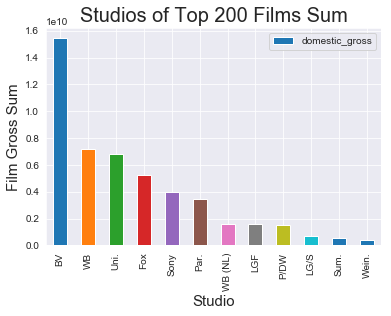

In [265]:
# Plot top 200 grossing films domestic gross sum by studio

top_200[['studio', 'domestic_gross']].groupby('studio').sum().reset_index().sort_values('domestic_gross', ascending = False).plot(kind = 'bar', x = 'studio', y = 'domestic_gross')
plt.title('Studios of Top 200 Films Sum', fontsize = 20)
plt.xlabel('Studio', fontsize = 15)
plt.ylabel('Film Gross Sum', fontsize = 15)

Text(0, 0.5, 'Film Gross Mean')

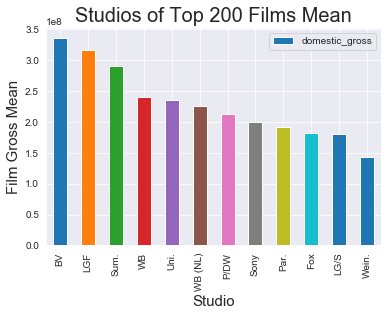

In [264]:
# Visualize top 200 grossing films mean by studio in descending order

top_200[['studio', 'domestic_gross']].groupby('studio').mean().reset_index().sort_values('domestic_gross', ascending = False).plot(kind = 'bar', x = 'studio', y = 'domestic_gross')
plt.title('Studios of Top 200 Films Mean', fontsize = 20)
plt.xlabel('Studio', fontsize = 15)
plt.ylabel('Film Gross Mean', fontsize = 15)



## Movie Budgets & Release Date

### Analyzing Budget Vs Profit

In [237]:
# Import file and preview 

movie_budgets = 'zippedData/tn.movie_budgets.csv.gz'
df2 = pd.read_csv(movie_budgets)
df2.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [238]:
# Preview meta data

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
id                   5782 non-null int64
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null object
domestic_gross       5782 non-null object
worldwide_gross      5782 non-null object
dtypes: int64(1), object(5)
memory usage: 271.1+ KB


In [239]:
# Inspect data types

df2.dtypes

id                    int64
release_date         object
movie                object
production_budget    object
domestic_gross       object
worldwide_gross      object
dtype: object

In [240]:
# Write a function to convert currency entries from objects to floats

def convert_currency(val):
    new_val = val.replace(',', '').replace('$', '')
    return float(new_val)

In [241]:
# Pass currency columns through function

df2['production_budget'] = df2['production_budget'].apply(convert_currency)

df2['domestic_gross'] = df2['domestic_gross'].apply(convert_currency)

df2['worldwide_gross'] = df2['worldwide_gross'].apply(convert_currency)

# Check data types to verify change

df2.dtypes


id                     int64
release_date          object
movie                 object
production_budget    float64
domestic_gross       float64
worldwide_gross      float64
dtype: object

In [242]:
# Preview file change

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
id                   5782 non-null int64
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null float64
domestic_gross       5782 non-null float64
worldwide_gross      5782 non-null float64
dtypes: float64(3), int64(1), object(2)
memory usage: 271.1+ KB


In [243]:
# Add foreign_gross column by subtracting domestic_gross from worldwide_gross

df2['foreign_gross'] = (df2['worldwide_gross'] - df2['domestic_gross'])

# Preview file change

df2.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2.015838e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,8.046000e+08
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,1.070000e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,9.440081e+08
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,6.965404e+08


In [244]:
# Calculate profit difference by subtracting production budget from worldwide gross

df2['profit_difference'] = (df2['worldwide_gross'] - df2['production_budget'])

# Preview new column

df2.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross,profit_difference
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2.015838e+09,2.351345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,8.046000e+08,6.350639e+08
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,1.070000e+08,-2.002376e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,9.440081e+08,1.072414e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,6.965404e+08,9.997217e+08


In [245]:
# Calculate profit quotient by dividing production budget from worldwide gross

df2['profit_quotient'] = (df2['worldwide_gross'] / df2['production_budget'])

# Preview new column

df2.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross,profit_difference,profit_quotient
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2.015838e+09,2.351345e+09,6.532577
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,8.046000e+08,6.350639e+08,2.546673
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,1.070000e+08,-2.002376e+08,0.427892
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,9.440081e+08,1.072414e+09,4.243841
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,6.965404e+08,9.997217e+08,4.153696


In [246]:
# Remove outlier that was skewing profit quotient representation

df2 = df2[df2.movie != 'Deep Throat']

In [247]:
# Verify outlier removal

df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5781 entries, 0 to 5781
Data columns (total 9 columns):
id                   5781 non-null int64
release_date         5781 non-null object
movie                5781 non-null object
production_budget    5781 non-null float64
domestic_gross       5781 non-null float64
worldwide_gross      5781 non-null float64
foreign_gross        5781 non-null float64
profit_difference    5781 non-null float64
profit_quotient      5781 non-null float64
dtypes: float64(6), int64(1), object(2)
memory usage: 451.6+ KB


### Plotting Budget Vs Gross & Profits

Text(0, 0.5, 'Worldwide Gross')

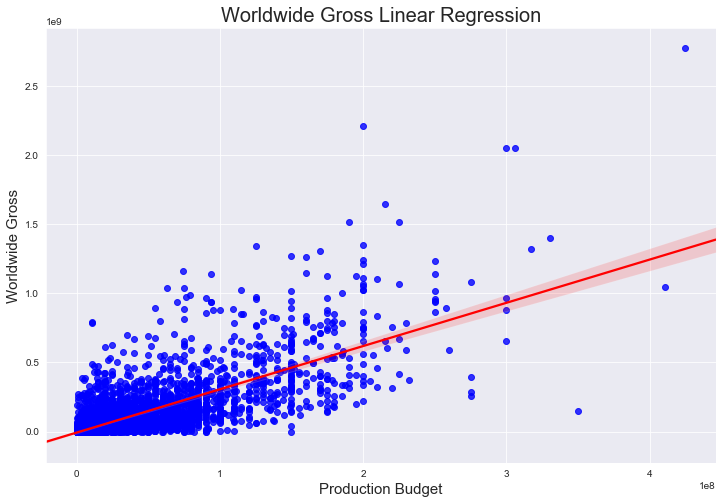

In [266]:
# Plot linear regression between production budget and worldwide gross for whole data set

f, ax = plt.subplots(figsize=(12,8))
sns.set_style('darkgrid')
sns.regplot(x = 'production_budget', y = 'worldwide_gross', data = df2, scatter_kws = {'color': 'b'}, line_kws = {'color':'red'})
plt.title('Worldwide Gross Linear Regression', fontsize = 20)
plt.xlabel('Production Budget', fontsize = 15)
plt.ylabel('Worldwide Gross', fontsize = 15)


In [249]:
# Calculate correlation between production budget and worldwide gross for whole data set

df2['production_budget'].corr(df2['worldwide_gross'])

0.7483126980177028

In [250]:
# Make list of top 500 profit quotients

top_500_q = df2.nlargest(500, 'profit_quotient')

# Preview list

top_500_q.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross,profit_difference,profit_quotient
5613,14,"Mar 21, 1980",Mad Max,200000.0,8750000.0,99750000.0,91000000.0,99550000.0,498.750000
5492,93,"Sep 25, 2009",Paranormal Activity,450000.0,107918810.0,194183034.0,86264224.0,193733034.0,431.517853
5679,80,"Jul 10, 2015",The Gallows,100000.0,22764410.0,41656474.0,18892064.0,41556474.0,416.564740
5406,7,"Jul 14, 1999",The Blair Witch Project,600000.0,140539099.0,248300000.0,107760901.0,247700000.0,413.833333
5709,10,"May 7, 2004",Super Size Me,65000.0,11529368.0,22233808.0,10704440.0,22168808.0,342.058585


In [251]:
# Create new list without outlier entry 

newdf = top_500_q.drop(top_500_q.index[0])
newdf.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross,profit_difference,profit_quotient
5492,93,"Sep 25, 2009",Paranormal Activity,450000.0,107918810.0,194183034.0,86264224.0,193733034.0,431.517853
5679,80,"Jul 10, 2015",The Gallows,100000.0,22764410.0,41656474.0,18892064.0,41556474.0,416.564740
5406,7,"Jul 14, 1999",The Blair Witch Project,600000.0,140539099.0,248300000.0,107760901.0,247700000.0,413.833333
5709,10,"May 7, 2004",Super Size Me,65000.0,11529368.0,22233808.0,10704440.0,22168808.0,342.058585
5346,47,"Aug 13, 1942",Bambi,858000.0,102797000.0,268000000.0,165203000.0,267142000.0,312.354312


Text(0, 0.5, 'Worldwide Gross')

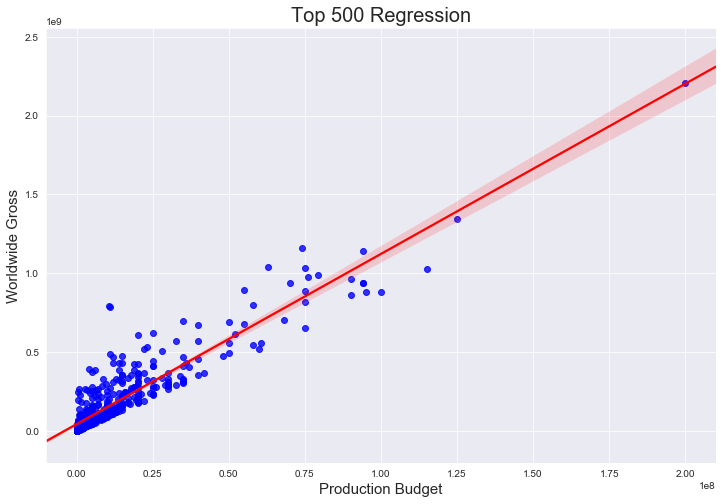

In [267]:
# Plot 500 top grossing movies budget vs worldwide gross

f, ax = plt.subplots(figsize=(12,8))
sns.set_style('darkgrid')
sns.regplot(x = 'production_budget', y = 'worldwide_gross', data = newdf, scatter_kws = {'color': 'b'}, line_kws = {'color':'red'})
plt.title('Top 500 Regression', fontsize = 20)
plt.xlabel('Production Budget', fontsize = 15)
plt.ylabel('Worldwide Gross', fontsize = 15)

In [253]:
# Check correlation of top 500 grossing films budget vs gross

newdf['production_budget'].corr(newdf['worldwide_gross'])

0.9217193758604848

Text(0, 0.5, 'Profit')

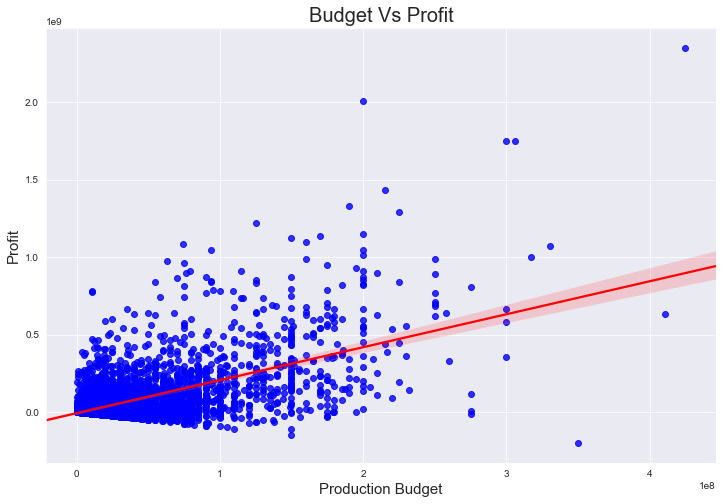

In [261]:
# Plot regression between production budget and profit for whole data set

f, ax = plt.subplots(figsize=(12,8))
sns.set_style('darkgrid')
sns.regplot(x = 'production_budget', y = 'profit_difference', data = df2, scatter_kws = {'color': 'b'}, line_kws = {'color':'red'})
plt.title('Budget Vs Profit', fontsize = 20)
plt.xlabel('Production Budget', fontsize = 15)
plt.ylabel('Profit', fontsize = 15)


In [255]:
# Check correlation of production budget and profit for whole data set

df2['production_budget'].corr(df2['profit_difference'])

0.6087693634139751

Text(0, 0.5, 'Profit')

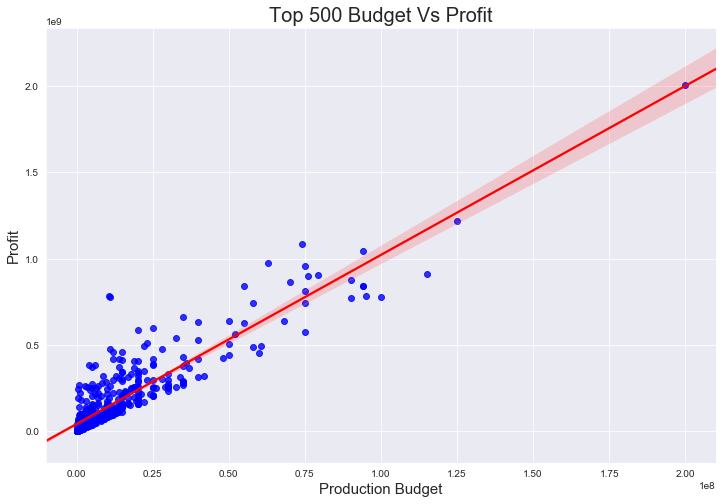

In [268]:
# Plot regression between production budget and profit for top 500 most profitable films

f, ax = plt.subplots(figsize=(12,8))
sns.set_style('darkgrid')
sns.regplot(x = 'production_budget', y = 'profit_difference', data = newdf, scatter_kws = {'color': 'b'}, line_kws = {'color':'red'})
plt.title('Top 500 Budget Vs Profit', fontsize = 20)
plt.xlabel('Production Budget', fontsize = 15)
plt.ylabel('Profit', fontsize = 15)

In [257]:
# Check correlation between production budget and profit for top 500 most profitable films

newdf['production_budget'].corr(newdf['profit_difference'])

0.9071938665660749

### Profit Mean By Month

In [165]:
# Create month dictionary to view release date column by month only

month_dict = {'Jan': '0', 'Feb': '1', 'Mar': '2', 'Apr': '3', 
              'May': '4', 'Jun': '5', 'Jul': '6', 'Aug': '7', 
              'Sep': '8', 'Oct': '9', 'Nov': '10', 'Dec':'11'}

In [166]:
# Format release date column to read as month abbreviation only

df2['release_month'] = [int(month_dict[i[0:3]]) for i in df2['release_date']]
df2['release_month'].head()

0    11
1     4
2     5
3     4
4    11
Name: release_month, dtype: int64

In [167]:
# Format top 500 dates to read as month abbreviations 

newdf['release_month'] = [int(month_dict[i[0:3]]) for i in newdf['release_date']]
newdf['release_month'].head()

5492    8
5679    6
5406    6
5709    4
5346    7
Name: release_month, dtype: int64

Text(0, 0.5, 'Profit Quotient')

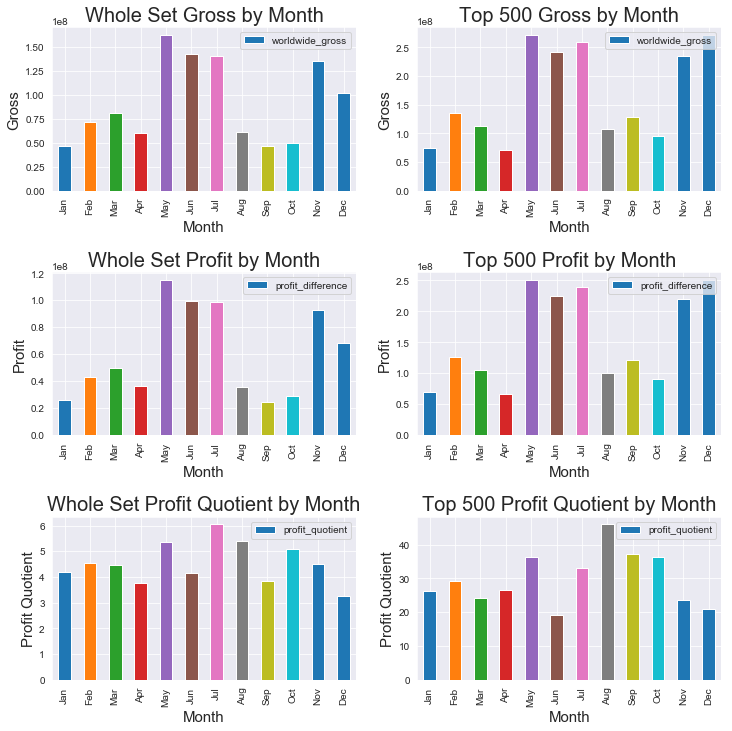

In [199]:
# Plot whole data set and top 500 grossing films by month

fig = plt.figure(figsize = (12,12))
plt.subplots_adjust(hspace = .5)


ax1 = plt.subplot(3,2,1)
monthg = df2[['release_month', 'worldwide_gross']].groupby('release_month').mean().reset_index().sort_values('release_month', ascending = True).plot(ax = ax1, kind = 'bar', x = 'release_month', y = 'worldwide_gross')
ax1.set_xticklabels(month_dict.keys())
plt.title('Whole Set Gross by Month', fontsize = 20)
plt.xlabel('Month', fontsize = 15)
plt.ylabel('Gross', fontsize = 15)

ax2 = plt.subplot(3,2,2)
topg = newdf[['release_month', 'worldwide_gross']].groupby('release_month').mean().reset_index().sort_values('release_month', ascending = True).plot(ax = ax2, kind = 'bar', x = 'release_month', y = 'worldwide_gross')
ax2.set_xticklabels(month_dict.keys())
plt.title('Top 500 Gross by Month', fontsize = 20)
plt.xlabel('Month', fontsize = 15)
plt.ylabel('Gross', fontsize = 15)

ax3 = plt.subplot(3,2,3)
wholep = df2[['release_month', 'profit_difference']].groupby('release_month').mean().reset_index().sort_values('release_month', ascending = True).plot(ax = ax3, kind = 'bar', x = 'release_month', y = 'profit_difference')
ax3.set_xticklabels(month_dict.keys())
plt.title('Whole Set Profit by Month', fontsize = 20)
plt.xlabel('Month', fontsize = 15)
plt.ylabel('Profit', fontsize = 15)

ax4 = plt.subplot(3,2,4)
topp = newdf[['release_month', 'profit_difference']].groupby('release_month').mean().reset_index().sort_values('release_month', ascending = True).plot(ax = ax4, kind = 'bar', x = 'release_month', y = 'profit_difference')
ax4.set_xticklabels(month_dict.keys())
plt.title('Top 500 Profit by Month', fontsize = 20)
plt.xlabel('Month', fontsize = 15)
plt.ylabel('Profit', fontsize = 15)

ax5 = plt.subplot(3,2,5)
wholepq = df2[['release_month', 'profit_quotient']].groupby('release_month').mean().reset_index().sort_values('release_month', ascending = True).plot(ax = ax5, kind = 'bar', x = 'release_month', y = 'profit_quotient')
ax5.set_xticklabels(month_dict.keys())
plt.title('Whole Set Profit Quotient by Month', fontsize = 20)
plt.xlabel('Month', fontsize = 15)
plt.ylabel('Profit Quotient', fontsize = 15)

ax6 = plt.subplot(3,2,6)
toppq = newdf[['release_month', 'profit_quotient']].groupby('release_month').mean().reset_index().sort_values('release_month', ascending = True).plot(ax = ax6, kind = 'bar', x = 'release_month', y = 'profit_quotient')
ax6.set_xticklabels(month_dict.keys())
plt.title('Top 500 Profit Quotient by Month', fontsize = 20)
plt.xlabel('Month', fontsize = 15)
plt.ylabel('Profit Quotient', fontsize = 15)



## Kaggle File

In [270]:
# Import and preview downloaded Kaggle movie file

kaggle_movies = 'zippedData/movies.csv'
df3 = pd.read_csv(kaggle_movies, encoding = "ISO-8859-1")
df3.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


In [271]:
# Preview file metadata

df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6820 entries, 0 to 6819
Data columns (total 15 columns):
budget      6820 non-null float64
company     6820 non-null object
country     6820 non-null object
director    6820 non-null object
genre       6820 non-null object
gross       6820 non-null float64
name        6820 non-null object
rating      6820 non-null object
released    6820 non-null object
runtime     6820 non-null int64
score       6820 non-null float64
star        6820 non-null object
votes       6820 non-null int64
writer      6820 non-null object
year        6820 non-null int64
dtypes: float64(3), int64(3), object(9)
memory usage: 799.3+ KB


In [272]:
# Preview null values for column to be used as groupby

df3['gross'].isnull().sum()

0

In [273]:
# Preview null values for column to be operated on

df3['budget'].isnull().sum()

0

In [274]:
df3['profit'] = (df3['gross'] - df3['budget'])

In [275]:
df3['profit_q'] = (df3['gross'] / df3['budget'])

In [276]:
df3.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,profit,profit_q
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986,44287414.0,6.535927
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986,64136369.0,11.689395
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986,164800601.0,11.986707
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986,66660248.0,4.603257
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986,9564613.0,2.062735


In [277]:
# Make list of top 500 entries by gross

top_500 = df3.nlargest(500, 'gross')
top_500.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,profit,profit_q
6380,245000000.0,Lucasfilm,USA,J.J. Abrams,Action,936662225.0,Star Wars: The Force Awakens,PG-13,2015-12-18,136,8.1,Daisy Ridley,687192,Lawrence Kasdan,2015,691662225.0,3.823111
5061,237000000.0,Twentieth Century Fox Film Corporation,UK,James Cameron,Action,760507625.0,Avatar,PG-13,2009-12-18,162,7.8,Sam Worthington,954412,James Cameron,2009,523507625.0,3.208893
2420,200000000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Drama,658672302.0,Titanic,PG-13,1997-12-19,194,7.8,Leonardo DiCaprio,862554,James Cameron,1997,458672302.0,3.293362
6391,150000000.0,Universal Pictures,USA,Colin Trevorrow,Action,652270625.0,Jurassic World,PG-13,2015-06-12,124,7.0,Chris Pratt,469200,Rick Jaffa,2015,502270625.0,4.348471
5723,220000000.0,Marvel Studios,USA,Joss Whedon,Action,623357910.0,The Avengers,PG-13,2012-05-04,143,8.1,Robert Downey Jr.,1064633,Joss Whedon,2012,403357910.0,2.833445


In [278]:
# Check Top 500 list for 0 value entries that could skew data

(top_500['budget'] == 0).sum()

3

In [279]:
# Check Top 500 list for 0 value entries that could skew data

(top_500['gross'] == 0).sum()

0

In [280]:
# Drop rows with 0 value entered as budget

top_500.drop(top_500[top_500['budget'] < 1].index, inplace = True)

In [281]:
# Check work

(top_500['budget'] == 0).sum()

0

In [282]:
# Create profit column

top_500['profit'] = (top_500['gross'] - top_500['budget'])

In [283]:
# Create profit quotient column

top_500['profit_q'] = (top_500['gross'] / top_500['budget'])

In [284]:
# Preview new columns

top_500.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,profit,profit_q
6380,245000000.0,Lucasfilm,USA,J.J. Abrams,Action,936662225.0,Star Wars: The Force Awakens,PG-13,2015-12-18,136,8.1,Daisy Ridley,687192,Lawrence Kasdan,2015,691662225.0,3.823111
5061,237000000.0,Twentieth Century Fox Film Corporation,UK,James Cameron,Action,760507625.0,Avatar,PG-13,2009-12-18,162,7.8,Sam Worthington,954412,James Cameron,2009,523507625.0,3.208893
2420,200000000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Drama,658672302.0,Titanic,PG-13,1997-12-19,194,7.8,Leonardo DiCaprio,862554,James Cameron,1997,458672302.0,3.293362
6391,150000000.0,Universal Pictures,USA,Colin Trevorrow,Action,652270625.0,Jurassic World,PG-13,2015-06-12,124,7.0,Chris Pratt,469200,Rick Jaffa,2015,502270625.0,4.348471
5723,220000000.0,Marvel Studios,USA,Joss Whedon,Action,623357910.0,The Avengers,PG-13,2012-05-04,143,8.1,Robert Downey Jr.,1064633,Joss Whedon,2012,403357910.0,2.833445


In [285]:
# Investigate runtime

top_500['runtime'].nunique()

94

In [286]:
# Break runtime down into 10 intervals

In [287]:
# Sort top 500 films by profit quotient 

sortedpq = top_500.sort_values(['profit_q'], ascending = False)
sortedpq.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,profit,profit_q
2885,60000.0,Haxan Films,USA,Daniel Myrick,Horror,140539099.0,The Blair Witch Project,R,1999-07-30,81,6.4,Heather Donahue,202691,Daniel Myrick,1999,140479099.0,2342.318317
3554,5000000.0,Gold Circle Films,Canada,Joel Zwick,Comedy,241438208.0,Casarse... está en griego,PG,2002-08-02,95,6.6,Nia Vardalos,107984,Nia Vardalos,2002,236438208.0,48.287642
5,6000000.0,Hemdale,UK,Oliver Stone,Drama,138530565.0,Platoon,R,1987-02-06,120,8.1,Charlie Sheen,317585,Oliver Stone,1986,132530565.0,23.088428
10,8800000.0,Rimfire Films,Australia,Peter Faiman,Adventure,174635000.0,Crocodile Dundee,PG-13,1986-09-26,97,6.5,Paul Hogan,79465,Ken Shadie,1986,165835000.0,19.844886
4643,7500000.0,Fox Searchlight Pictures,USA,Jason Reitman,Comedy,143495265.0,Juno,PG-13,2007-12-25,96,7.5,Ellen Page,439421,Diablo Cody,2007,135995265.0,19.132702


In [288]:
# Remove single outlier 

newdf = sortedpq.drop(sortedpq.index[0])
newdf.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,profit,profit_q
3554,5000000.0,Gold Circle Films,Canada,Joel Zwick,Comedy,241438208.0,Casarse... está en griego,PG,2002-08-02,95,6.6,Nia Vardalos,107984,Nia Vardalos,2002,236438208.0,48.287642
5,6000000.0,Hemdale,UK,Oliver Stone,Drama,138530565.0,Platoon,R,1987-02-06,120,8.1,Charlie Sheen,317585,Oliver Stone,1986,132530565.0,23.088428
10,8800000.0,Rimfire Films,Australia,Peter Faiman,Adventure,174635000.0,Crocodile Dundee,PG-13,1986-09-26,97,6.5,Paul Hogan,79465,Ken Shadie,1986,165835000.0,19.844886
4643,7500000.0,Fox Searchlight Pictures,USA,Jason Reitman,Comedy,143495265.0,Juno,PG-13,2007-12-25,96,7.5,Ellen Page,439421,Diablo Cody,2007,135995265.0,19.132702
680,7500000.0,TriStar Pictures,USA,Amy Heckerling,Comedy,140088813.0,Look Who's Talking,PG-13,1989-10-13,93,5.8,John Travolta,67535,Amy Heckerling,1989,132588813.0,18.678508


### Kaggle Plots

Text(0, 0.5, 'Profit Quotient')

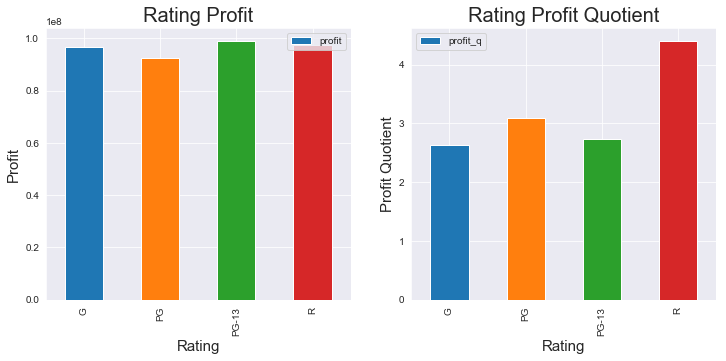

In [289]:
# Plot profit and profit quotient by rating together

fig = plt.figure(figsize = (12,5))
ax1 = plt.subplot(1,2,1)
profit = newdf[['rating', 'profit']].groupby('rating').mean().reset_index().sort_values('rating', ascending = True).plot(ax = ax1, kind = 'bar', x = 'rating', y = 'profit')
plt.title('Rating Profit', fontsize = 20)
plt.xlabel('Rating', fontsize = 15)
plt.ylabel('Profit', fontsize = 15)

ax2 = plt.subplot(1,2,2)
profitq = newdf[['rating', 'profit_q']].groupby('rating').mean().reset_index().sort_values('rating', ascending = True).plot(ax =ax2, kind = 'bar', x = 'rating', y = 'profit_q')
plt.title('Rating Profit Quotient', fontsize = 20)
plt.xlabel('Rating', fontsize = 15)
plt.ylabel('Profit Quotient', fontsize = 15)

Text(0, 0.5, 'Profit Quotient')

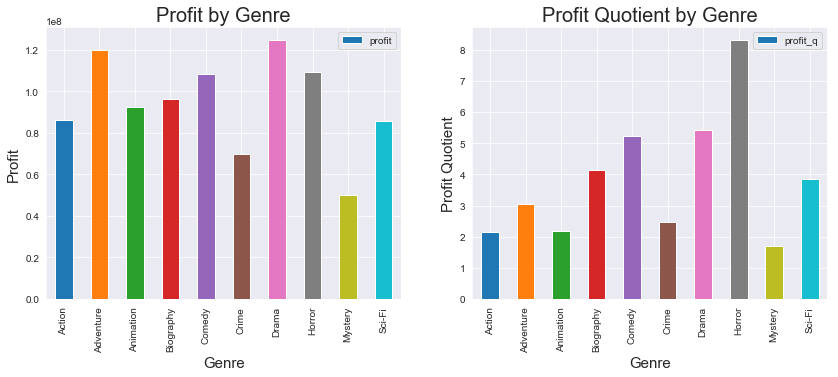

In [221]:
# Plot profit and profit quotient by genre together

fig = plt.figure(figsize = (14,5))
ax1 = plt.subplot(1,2,1)
genrep = newdf[['genre', 'profit']].groupby('genre').mean().reset_index().sort_values('genre', ascending = True).plot(ax = ax1, kind = 'bar', x = 'genre', y = 'profit')
plt.title('Profit by Genre', fontsize = 20)
plt.xlabel('Genre', fontsize = 15)
plt.ylabel('Profit', fontsize = 15)

ax2 = plt.subplot(1,2,2)
genrepq = newdf[['genre', 'profit_q']].groupby('genre').mean().reset_index().sort_values('genre', ascending = True).plot(ax = ax2, kind = 'bar', x = 'genre', y = 'profit_q')
plt.title('Profit Quotient by Genre', fontsize = 20)
plt.xlabel('Genre', fontsize = 15)
plt.ylabel('Profit Quotient', fontsize = 15)


Text(0, 0.5, 'Profit Quotient')

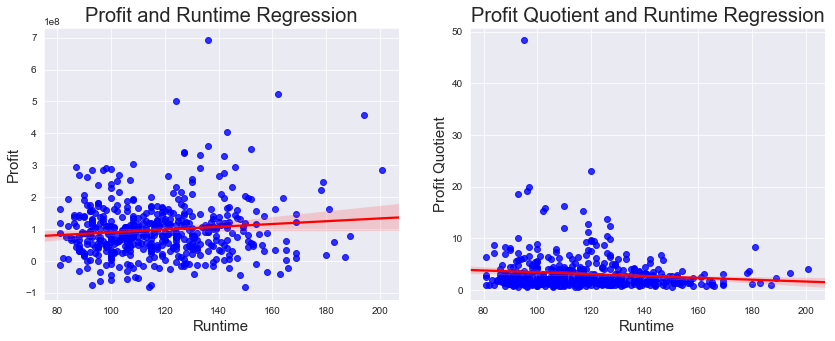

In [225]:
# Plot profit and profit quotient by runtime

fig = plt.figure(figsize = (14,5))
ax1 = plt.subplot(1,2,1)
sns.set_style('darkgrid')
sns.regplot(ax = ax1, x = 'runtime', y = 'profit', data = newdf, scatter_kws = {'color': 'b'}, line_kws = {'color':'red'})
plt.title('Profit and Runtime Regression', fontsize = 20)
plt.xlabel('Runtime', fontsize = 15)
plt.ylabel('Profit', fontsize = 15)

ax2 = plt.subplot(1,2,2)
sns.set_style('darkgrid')
sns.regplot(ax = ax2, x = 'runtime', y = 'profit_q', data = newdf, scatter_kws = {'color': 'b'}, line_kws = {'color':'red'})
plt.title('Profit Quotient and Runtime Regression', fontsize = 20)
plt.xlabel('Runtime', fontsize = 15)
plt.ylabel('Profit Quotient', fontsize = 15)